In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [12]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [2]:
import shap

In [3]:
import pandas as pd
import numpy as np
data = pd.read_csv("data_banknote_authentication.txt", header=None)
data.head(3)

,0,1,2,3,4
0,3.6216,8.6661,-2.8073,-0.44699,0
1,4.5459,8.1674,-2.4586,-1.46210,0
2,3.8660,-2.6383,1.9242,0.10645,0


In [4]:
data[0]

0       3.62160
1       4.54590
2       3.86600
3       3.45660
4       0.32924
         ...   
1367    0.40614
1368   -1.38870
1369   -3.75030
1370   -3.56370
1371   -2.54190
Name: 0, Length: 1372, dtype: float64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1372 non-null   float64
 1   1       1372 non-null   float64
 2   2       1372 non-null   float64
 3   3       1372 non-null   float64
 4   4       1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [6]:
data.describe()

,0,1,2,3,4
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [7]:
data.iloc[:, -1].value_counts()

0    762
1    610
Name: 4, dtype: int64

In [8]:
features = [0, 1, 2, 3]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(data[features], data[4], random_state=0)

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
model = RandomForestClassifier()

model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [34]:
pip install xgboost

  Using cached xgboost-1.4.2-py3-none-win_amd64.whl (97.8 MB)



In [12]:
import xgboost

In [13]:
model = xgboost.train({"learning_rate": 0.01}, 
                      xgboost.DMatrix(X_train, label=y_train), 100)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])

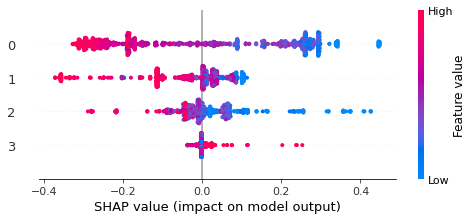

In [14]:
shap.summary_plot(shap_values, X_train)

In [ ]:
Как его читать:

значения слева от центральной вертикальной линии — это negative класс (0), справа — positive (1)
чем толще линия на графике, тем больше таких точек наблюдения
чем краснее точка на графике, тем выше значения признака в ней
Из графика можно сделать интересные выводы и проверить их адекватность:

чем старше человек, тем выше вероятность ухода
чем признак IsActiveMember выше, то вероятность ухода ниже
чем выше баланс, тем выше вероятность ухода (?)

1) наибольшее значение имеет признак 0 для определения негативного класса (0) - variance of Wavelet Transformed image (continuous), 1 признак также имеет значение  для определения негативного класса (0) - skewness of Wavelet Transformed image (continuous)